In [5]:
from dataloader import *

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

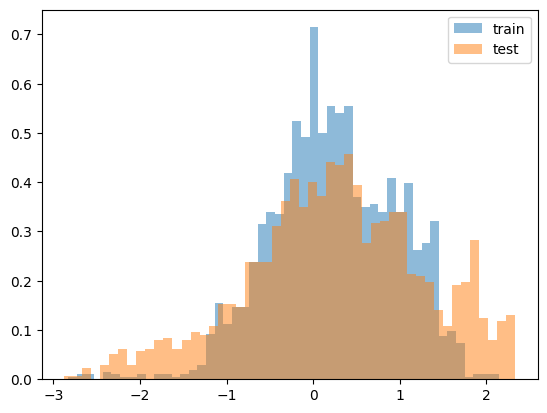

In [ ]:
training_dataset = SlidingDataset(
    parquet_file="Dataset/VG5_generator_data_training_measurements.parquet",
    operating_mode="turbine",
    transient=False,
    window_size=1,
    device="cpu",
    features=[],
    downsampling=32,
)
testing_dataset = SlidingDataset(
    parquet_file="Dataset/VG5_generator_data_testing_synthetic_01_measurements.parquet",
    operating_mode="turbine",
    transient=False,
    window_size=1,
    device="cpu",
    features=[],
    downsampling=32,
    mean=training_dataset.mean,
    std=training_dataset.std,
)

mask = np.isin(training_dataset.index.astype("datetime64[M]").astype(int) % 12 + 1, [6, 7])

col = np.nonzero(training_dataset.df.columns == "stat_magn_agg")[0]
fig, ax = plt.subplots()
ax.hist(training_dataset.measurements[mask, col], density=True, alpha=0.5, label="train", bins=50)
ax.hist(testing_dataset.measurements[:, col], density=True, alpha=0.5, label="test", bins=50)
ax.legend()

In [ ]:
"""fig, ax = plt.subplots(1, 1, figsize=(22, 18))
sns.heatmap(training_dataset.corr(), cmap="vlag", xticklabels=True, yticklabels=True)
ax.set_title(f"Correlation map for {unit}")

components = pd.DataFrame(pca.components_, columns=data_train.columns)
fig, ax = plt.subplots(1, 1, figsize=(18, 14))
sns.heatmap(components.transpose(), cmap="vlag", xticklabels="auto", yticklabels=True)
ax.set_title(f"Principal components (eigenspace) map for {unit}")"""

'fig, ax = plt.subplots(1, 1, figsize=(22, 18))\nsns.heatmap(training_dataset.corr(), cmap="vlag", xticklabels=True, yticklabels=True)\nax.set_title(f"Correlation map for {unit}")\n\ncomponents = pd.DataFrame(pca.components_, columns=data_train.columns)\nfig, ax = plt.subplots(1, 1, figsize=(18, 14))\nsns.heatmap(components.transpose(), cmap="vlag", xticklabels="auto", yticklabels=True)\nax.set_title(f"Principal components (eigenspace) map for {unit}")'